In [249]:
# Terminal çıktılarını gizlemek için " %%capture output " kullanıldı.
%%capture output

# **1. Gerekli Kütüphaneleri İçe Aktarama**

In [251]:
# Gerekli kütüphaneleri import ediyoruz.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import *  # Scikit-learn kütüphanesinin tüm modüllerini içe aktarıyoruz.
from scipy.spatial.distance import cdist
from sklearn.linear_model import LinearRegression
from scipy import stats

# **2. Veri Seti İnceleme ve Temizleme**

### 2.1. Veri Setini Görüntüleyelim

In [315]:
pd.set_option('display.max_columns', None) # Sütun sayısını sınırlamasını kaldırıyoruz.
df = pd.read_csv("Melbourne_housing_FULL.csv") # "Melbourne_housing_FULLcsv" dosyasını okuyarak bir DataFrame oluşturuyoruz.
df.head() # DataFrame'in ilk 5 satırını görüntülüyoruz.

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [316]:
df.shape # veri setinin boyutunu öğrendik

(34857, 21)

### 2.2.  Veri Setinde NaN Değer Kontrolü Yapalım

In [317]:
df.isna().sum() # NaN değer kontorlü

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [318]:
df = df.dropna(subset=["Regionname"])

# Silinmiş veriyi görüntüledim
print(df)

           Suburb             Address  Rooms Type      Price Method  \
0      Abbotsford       68 Studley St      2    h        NaN     SS   
1      Abbotsford        85 Turner St      2    h  1480000.0      S   
2      Abbotsford     25 Bloomburg St      2    h  1035000.0      S   
3      Abbotsford  18/659 Victoria St      3    u        NaN     VB   
4      Abbotsford        5 Charles St      3    h  1465000.0     SP   
...           ...                 ...    ...  ...        ...    ...   
34852  Yarraville         13 Burns St      4    h  1480000.0     PI   
34853  Yarraville       29A Murray St      2    h   888000.0     SP   
34854  Yarraville      147A Severn St      2    t   705000.0      S   
34855  Yarraville    12/37 Stephen St      3    h  1140000.0     SP   
34856  Yarraville    3 Tarrengower St      2    h  1020000.0     PI   

             SellerG        Date  Distance  Postcode  Bedroom2  Bathroom  Car  \
0             Jellis   3/09/2016       2.5    3067.0       2.0    

In [319]:
df.isna().sum() # NaN değer kontorlü

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2          8214
Bathroom          8223
Car               8725
Landsize         11807
BuildingArea     21112
YearBuilt        19303
CouncilArea          0
Lattitude         7973
Longtitude        7973
Regionname           0
Propertycount        0
dtype: int64

In [320]:
# "Regionname" sütunundaki benzersiz değerleri
unique_regionnames = df["Regionname"].unique()
unique_regionnames

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'], dtype=object)

# Sütun Doldurma İşlemleri

In [321]:
# Eksik koordinatları doldurmak için
def fill_missing_coordinates(row):
    if pd.notna(row['Lattitude']):
        return row['Lattitude'], row['Longtitude']

    region = row['Regionname']
    same_region = df[df['Regionname'] == region]
    distances = cdist(same_region[['Lattitude', 'Longtitude']], [[row['Lattitude'], row['Longtitude']]], metric='euclidean')
    nearest_index = distances.argmin()
    nearest_coordinates = same_region.iloc[nearest_index]
    return nearest_coordinates['Lattitude'], nearest_coordinates['Longtitude']

# Eksik koordinatları doldurdum
df['Lattitude'], df['Longtitude'] = zip(*df.apply(fill_missing_coordinates, axis=1))

# Doldurulmuş veriyi görüntüleme
print(df)

           Suburb             Address  Rooms Type      Price Method  \
0      Abbotsford       68 Studley St      2    h        NaN     SS   
1      Abbotsford        85 Turner St      2    h  1480000.0      S   
2      Abbotsford     25 Bloomburg St      2    h  1035000.0      S   
3      Abbotsford  18/659 Victoria St      3    u        NaN     VB   
4      Abbotsford        5 Charles St      3    h  1465000.0     SP   
...           ...                 ...    ...  ...        ...    ...   
34852  Yarraville         13 Burns St      4    h  1480000.0     PI   
34853  Yarraville       29A Murray St      2    h   888000.0     SP   
34854  Yarraville      147A Severn St      2    t   705000.0      S   
34855  Yarraville    12/37 Stephen St      3    h  1140000.0     SP   
34856  Yarraville    3 Tarrengower St      2    h  1020000.0     PI   

             SellerG        Date  Distance  Postcode  Bedroom2  Bathroom  Car  \
0             Jellis   3/09/2016       2.5    3067.0       2.0    

In [322]:
df.isna().sum() # NaN değer kontorlü

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2          8214
Bathroom          8223
Car               8725
Landsize         11807
BuildingArea     21112
YearBuilt        19303
CouncilArea          0
Lattitude          390
Longtitude         390
Regionname           0
Propertycount        0
dtype: int64

In [323]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,4.0,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,NaN,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,-37.71800,144.87800,Western Metropolitan,6543.0


In [324]:
df = df.dropna(subset=["Longtitude"])

# Silinmiş veriyi görüntüleme
print(df)

           Suburb             Address  Rooms Type      Price Method  \
0      Abbotsford       68 Studley St      2    h        NaN     SS   
1      Abbotsford        85 Turner St      2    h  1480000.0      S   
2      Abbotsford     25 Bloomburg St      2    h  1035000.0      S   
3      Abbotsford  18/659 Victoria St      3    u        NaN     VB   
4      Abbotsford        5 Charles St      3    h  1465000.0     SP   
...           ...                 ...    ...  ...        ...    ...   
34852  Yarraville         13 Burns St      4    h  1480000.0     PI   
34853  Yarraville       29A Murray St      2    h   888000.0     SP   
34854  Yarraville      147A Severn St      2    t   705000.0      S   
34855  Yarraville    12/37 Stephen St      3    h  1140000.0     SP   
34856  Yarraville    3 Tarrengower St      2    h  1020000.0     PI   

             SellerG        Date  Distance  Postcode  Bedroom2  Bathroom  Car  \
0             Jellis   3/09/2016       2.5    3067.0       2.0    

In [325]:
df.isna().sum() # NaN değer kontorlü


Suburb               0
Address              0
Rooms                0
Type                 0
Price             7532
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2          7828
Bathroom          7837
Car               8339
Landsize         11421
BuildingArea     20723
YearBuilt        18914
CouncilArea          0
Lattitude            0
Longtitude           0
Regionname           0
Propertycount        0
dtype: int64

In [326]:
unique_car_values = df["Car"].unique()
unique_car_values

array([ 1.,  0.,  2., nan,  6.,  5.,  4.,  3.,  8.,  7., 11., 26.,  9.,
       10., 18., 12.])

In [327]:
unique_buildingArea  = df["BuildingArea"].unique()
unique_buildingArea

array([         nan, 7.900000e+01, 1.500000e+02, 1.420000e+02,
       2.200000e+02, 2.100000e+02, 8.200000e+01, 1.470000e+02,
       1.070000e+02, 7.500000e+01, 8.000000e+01, 1.900000e+02,
       9.400000e+01, 9.700000e+01, 1.290000e+02, 1.100000e+02,
       1.050000e+02, 7.300000e+01, 1.350000e+02, 1.670000e+02,
       2.700000e+01, 6.000000e+01, 8.500000e+01, 1.740000e+02,
       5.000000e+01, 1.280000e+02, 1.800000e+01, 1.240000e+02,
       9.100000e+01, 8.100000e+01, 2.250000e+02, 1.450000e+02,
       1.140000e+02, 8.400000e+01, 1.340000e+02, 1.160000e+02,
       8.600000e+01, 1.270000e+02, 1.860000e+02, 9.000000e+01,
       1.330000e+02, 1.300000e+02, 1.130000e+02, 1.000000e+02,
       3.090000e+02, 1.920000e+02, 1.260000e+02, 1.010000e+02,
       1.020000e+02, 7.600000e+01, 1.460000e+02, 1.980000e+02,
       1.800000e+02, 1.250000e+02, 1.590000e+02, 1.220000e+02,
       8.800000e+01, 1.810000e+02, 1.170000e+02, 9.800000e+01,
       8.300000e+01, 2.540000e+02, 1.230000e+02, 1.1900

In [328]:
unique_room  = df["Rooms"].unique()
unique_room

array([ 2,  3,  4,  1,  5,  6,  7,  8, 10,  9, 12, 16])

In [329]:
# 16 odası olan yerin satırını seçme
room_16 = df[df["Rooms"] == 16]
room_16

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
26210,Mitcham,20 Harrison St,16,h,5000000.0,S,Buxton,28/10/2017,17.2,3132.0,16.0,8.0,8.0,NaN,NaN,NaN,Whitehorse City Council,-37.81405,145.19891,Eastern Metropolitan,6871.0


In [330]:
# Eksik YearBuilt değerlerini tahmin etmek için bölgeye göre ortalama kullanarak doldurma
df["YearBuilt"].fillna(df.groupby("Suburb")["YearBuilt"].transform("mean"), inplace=True)
df

<ipython-input-330-709794182e7f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["YearBuilt"].fillna(df.groupby("Suburb")["YearBuilt"].transform("mean"), inplace=True)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,1942.545455,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,1942.545455,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.000000,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,1942.545455,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.000000,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,4.0,1.0,3.0,593.0,NaN,1949.392857,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.000000,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.000000,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,NaN,NaN,NaN,NaN,NaN,1949.392857,Maribyrnong City Council,-37.71800,144.87800,Western Metropolitan,6543.0


In [331]:
# 16 odası olan yerin satırı görüntüleme
room_16 = df[df["Rooms"] == 16]
room_16

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
26210,Mitcham,20 Harrison St,16,h,5000000.0,S,Buxton,28/10/2017,17.2,3132.0,16.0,8.0,8.0,NaN,NaN,1978.25,Whitehorse City Council,-37.81405,145.19891,Eastern Metropolitan,6871.0


In [332]:
df.isna().sum() # NaN değer kontorlü


Suburb               0
Address              0
Rooms                0
Type                 0
Price             7532
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2          7828
Bathroom          7837
Car               8339
Landsize         11421
BuildingArea     20723
YearBuilt          115
CouncilArea          0
Lattitude            0
Longtitude           0
Regionname           0
Propertycount        0
dtype: int64

## Sütun Temizleme işlemleri

In [333]:
# "YearBuilt" sütunundaki NaN değerleri silme
df.dropna(subset=["YearBuilt"], inplace=True)

<ipython-input-333-a59fdcd08fec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=["YearBuilt"], inplace=True)


In [334]:
# YearBuilt sütunundaki ondalık kısmı silme işlemi
df["YearBuilt"] = df["YearBuilt"].apply(int)
df

<ipython-input-334-8ada89808f84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["YearBuilt"] = df["YearBuilt"].apply(int)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,1942,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,1942,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,1942,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,4.0,1.0,3.0,593.0,NaN,1949,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,NaN,NaN,NaN,NaN,NaN,1949,Maribyrnong City Council,-37.71800,144.87800,Western Metropolitan,6543.0


In [335]:
df.isna().sum() # NaN değer kontorlü

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7506
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2          7735
Bathroom          7744
Car               8245
Landsize         11325
BuildingArea     20608
YearBuilt            0
CouncilArea          0
Lattitude            0
Longtitude           0
Regionname           0
Propertycount        0
dtype: int64

## Feature Eng. İşlemleri

In [336]:
# Hem mülk tipi hem de bölgeye göre "BuildingArea" değerlerinin ortalamasını kullanarak eksik değerleri doldurma işlemi
df["BuildingArea"] = df.groupby(["Type", "Regionname"])["BuildingArea"].transform(lambda x: x.fillna(x.mean()))
df

<ipython-input-336-4723c3c5814c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["BuildingArea"] = df.groupby(["Type", "Regionname"])["BuildingArea"].transform(lambda x: x.fillna(x.mean()))


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,147.252441,1942,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,147.252441,1942,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.000000,1900,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,74.912480,1942,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.000000,1900,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,4.0,1.0,3.0,593.0,163.788064,1949,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,2.0,2.0,1.0,98.0,104.000000,2018,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,2.0,1.0,2.0,220.0,120.000000,2000,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,NaN,NaN,NaN,NaN,163.788064,1949,Maribyrnong City Council,-37.71800,144.87800,Western Metropolitan,6543.0


In [337]:
df.isna().sum() # NaN değer kontorlü

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7506
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2          7735
Bathroom          7744
Car               8245
Landsize         11325
BuildingArea         3
YearBuilt            0
CouncilArea          0
Lattitude            0
Longtitude           0
Regionname           0
Propertycount        0
dtype: int64

In [338]:
#Aynı işlemi Landsize 'a yaptım
df["Landsize"] = df.groupby(["Type", "Regionname"])["Landsize"].transform(lambda x: x.fillna(x.mean()))
df

<ipython-input-338-23062c1be5d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Landsize"] = df.groupby(["Type", "Regionname"])["Landsize"].transform(lambda x: x.fillna(x.mean()))


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.000000,147.252441,1942,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.000000,147.252441,1942,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.000000,79.000000,1900,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.000000,74.912480,1942,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.000000,150.000000,1900,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,4.0,1.0,3.0,593.000000,163.788064,1949,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,2.0,2.0,1.0,98.000000,104.000000,2018,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,2.0,1.0,2.0,220.000000,120.000000,2000,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,NaN,NaN,NaN,541.941131,163.788064,1949,Maribyrnong City Council,-37.71800,144.87800,Western Metropolitan,6543.0


In [339]:
df.isna().sum() # NaN değer kontorlü

Suburb              0
Address             0
Rooms               0
Type                0
Price            7506
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2         7735
Bathroom         7744
Car              8245
Landsize            3
BuildingArea        3
YearBuilt           0
CouncilArea         0
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

## Sütun doldurma işlemleri

In [340]:
# Eksik "Price" değerlerini benzer diğer verilere dayalı olarak doldurun
for index, row in df.iterrows():
    if pd.isna(row["Price"]):
        similar_data = df[
            (df["Date"] == row["Date"]) &
            (df["Method"] == row["Method"]) &
            (df["Suburb"] == row["Suburb"]) &
            (df["BuildingArea"] == row["BuildingArea"]) &
            (df["Rooms"] == row["Rooms"])
        ]
        if not similar_data.empty:
            df.at[index, "Price"] = similar_data["Price"].mean()

# Doldurulmuş veriyi görüntüleyin
print(df)

           Suburb             Address  Rooms Type      Price Method  \
0      Abbotsford       68 Studley St      2    h        NaN     SS   
1      Abbotsford        85 Turner St      2    h  1480000.0      S   
2      Abbotsford     25 Bloomburg St      2    h  1035000.0      S   
3      Abbotsford  18/659 Victoria St      3    u        NaN     VB   
4      Abbotsford        5 Charles St      3    h  1465000.0     SP   
...           ...                 ...    ...  ...        ...    ...   
34852  Yarraville         13 Burns St      4    h  1480000.0     PI   
34853  Yarraville       29A Murray St      2    h   888000.0     SP   
34854  Yarraville      147A Severn St      2    t   705000.0      S   
34855  Yarraville    12/37 Stephen St      3    h  1140000.0     SP   
34856  Yarraville    3 Tarrengower St      2    h  1020000.0     PI   

             SellerG        Date  Distance  Postcode  Bedroom2  Bathroom  Car  \
0             Jellis   3/09/2016       2.5    3067.0       2.0    

In [341]:
df.isna().sum() # NaN değer kontorlü

Suburb              0
Address             0
Rooms               0
Type                0
Price            7074
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2         7735
Bathroom         7744
Car              8245
Landsize            3
BuildingArea        3
YearBuilt           0
CouncilArea         0
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [342]:
# Eksik "Price" değerlerini benzer konum ve bina yaşına göre doldurun
for index, row in df.iterrows():
    if pd.isna(row["Price"]):
        similar_data = df[
            (df["Suburb"] == row["Suburb"]) &
            (df["YearBuilt"] == row["YearBuilt"])
        ]
        if not similar_data.empty:
            df.at[index, "Price"] = similar_data["Price"].mean()

# Doldurulmuş veriyi görüntüleyin
print(df)

           Suburb             Address  Rooms Type         Price Method  \
0      Abbotsford       68 Studley St      2    h  9.656154e+05     SS   
1      Abbotsford        85 Turner St      2    h  1.480000e+06      S   
2      Abbotsford     25 Bloomburg St      2    h  1.035000e+06      S   
3      Abbotsford  18/659 Victoria St      3    u  9.656154e+05     VB   
4      Abbotsford        5 Charles St      3    h  1.465000e+06     SP   
...           ...                 ...    ...  ...           ...    ...   
34852  Yarraville         13 Burns St      4    h  1.480000e+06     PI   
34853  Yarraville       29A Murray St      2    h  8.880000e+05     SP   
34854  Yarraville      147A Severn St      2    t  7.050000e+05      S   
34855  Yarraville    12/37 Stephen St      3    h  1.140000e+06     SP   
34856  Yarraville    3 Tarrengower St      2    h  1.020000e+06     PI   

             SellerG        Date  Distance  Postcode  Bedroom2  Bathroom  Car  \
0             Jellis   3/09/20

In [343]:
df.isna().sum() # NaN değer kontorlü

Suburb              0
Address             0
Rooms               0
Type                0
Price             826
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2         7735
Bathroom         7744
Car              8245
Landsize            3
BuildingArea        3
YearBuilt           0
CouncilArea         0
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [344]:
unique_room = df["Rooms"].unique()
unique_room

array([ 2,  3,  4,  1,  5,  6,  7,  8, 10,  9, 12, 16])

In [345]:
unique_bathroom = df["Bathroom"].unique()
unique_bathroom

array([ 1.,  2., nan,  3.,  7.,  4.,  0.,  5.,  6., 12.,  8.,  9.])

In [346]:
unique_bedroom2 = df["Bedroom2"].unique()
unique_bedroom2

array([ 2.,  3.,  4.,  6., nan,  1.,  5.,  7.,  0.,  8.,  9., 30., 20.,
       10., 16., 12.])

In [347]:
row_with_30_bathrooms = df[df["Bathroom"] == 12]
row_with_30_bathrooms

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2536,Burwood,36 Cumming St,3,h,1349237.0,PI,Ross,8/10/2016,11.7,3125.0,30.0,12.0,0.0,946.0,197.853836,1950,Monash City Council,-37.853,145.1129,Southern Metropolitan,5678.0


In [348]:
# 2536. satırı sildim
df = df.drop(2536)

# Güncellenmiş veri çerçevesini görüntüleyin
print(df)

           Suburb             Address  Rooms Type         Price Method  \
0      Abbotsford       68 Studley St      2    h  9.656154e+05     SS   
1      Abbotsford        85 Turner St      2    h  1.480000e+06      S   
2      Abbotsford     25 Bloomburg St      2    h  1.035000e+06      S   
3      Abbotsford  18/659 Victoria St      3    u  9.656154e+05     VB   
4      Abbotsford        5 Charles St      3    h  1.465000e+06     SP   
...           ...                 ...    ...  ...           ...    ...   
34852  Yarraville         13 Burns St      4    h  1.480000e+06     PI   
34853  Yarraville       29A Murray St      2    h  8.880000e+05     SP   
34854  Yarraville      147A Severn St      2    t  7.050000e+05      S   
34855  Yarraville    12/37 Stephen St      3    h  1.140000e+06     SP   
34856  Yarraville    3 Tarrengower St      2    h  1.020000e+06     PI   

             SellerG        Date  Distance  Postcode  Bedroom2  Bathroom  Car  \
0             Jellis   3/09/20

In [349]:
# "Bathroom" sayısı "Rooms" sayısından fazla olan satırları bulup sildik
rows_to_remove = df[df["Bathroom"] > df["Rooms"]]

df = df.drop(rows_to_remove.index)

In [350]:
df.isna().sum() # NaN değer kontorlü

Suburb              0
Address             0
Rooms               0
Type                0
Price             825
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2         7735
Bathroom         7744
Car              8245
Landsize            3
BuildingArea        3
YearBuilt           0
CouncilArea         0
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [351]:
unique_types = df["Type"].unique()
unique_types

array(['h', 'u', 't'], dtype=object)

## Detaylı ve Alakalı sütun doldurma adımları

In [352]:
# "Type" sütunu "townhouse" olan satırlardaki "Car" değerlerini ortalama değer ile doldurduk
townhouse_rows = df[df["Type"] == "t"]
townhouse_mean_car = townhouse_rows["Car"].mean()
df.loc[(df["Type"] == "t") & (pd.isna(df["Car"])), "Car"] = townhouse_mean_car

In [353]:
# "Type" sütunu "townhouse" olan satırlardaki "Bedroom2" değerlerini ortalama değer ile doldurduk
townhouse_rows = df[df["Type"] == "t"]
townhouse_mean_Bedroom2 = townhouse_rows["Bedroom2"].mean()
df.loc[(df["Type"] == "t") & (pd.isna(df["Bedroom2"])), "Bedroom2"] = townhouse_mean_Bedroom2

In [354]:
# "Type" sütunu "townhouse" olan satırlardaki "Bathroom" değerlerini ortalama değer ile doldurduk
townhouse_rows = df[df["Type"] == "t"]
townhouse_mean_Bathroom = townhouse_rows["Bathroom"].mean()
df.loc[(df["Type"] == "t") & (pd.isna(df["Bathroom"])), "Bathroom"] = townhouse_mean_Bathroom

In [355]:
# "Type" sütunu "house" olan satırlardaki "Car" değerlerini ortalama değer ile doldurduk
house_rows = df[df["Type"] == "h"]
house_mean_car = house_rows["Car"].mean()
df.loc[(df["Type"] == "h") & (pd.isna(df["Car"])), "Car"] = house_mean_car

In [356]:
# "Type" sütunu "house" olan satırlardaki "Bedroom2" değerlerini ortalama değer ile doldurduk
house_rows = df[df["Type"] == "h"]
house_mean_Bedroom2 = house_rows["Bedroom2"].mean()
df.loc[(df["Type"] == "h") & (pd.isna(df["Bedroom2"])), "Bedroom2"] = house_mean_Bedroom2

In [357]:
# "Type" sütunu "house" olan satırlardaki "Bathroom" değerlerini ortalama değer ile doldurduk
house_rows = df[df["Type"] == "h"]
house_mean_Bathroom = house_rows["Bathroom"].mean()
df.loc[(df["Type"] == "h") & (pd.isna(df["Bathroom"])), "Bathroom"] = house_mean_Bathroom

In [358]:
df.isna().sum() # NaN değer kontorlü

Suburb              0
Address             0
Rooms               0
Type                0
Price             825
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2         2873
Bathroom         2874
Car              2890
Landsize            3
BuildingArea        3
YearBuilt           0
CouncilArea         0
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [359]:
# "Type" sütunu "unit" olan satırlardaki "Car" değerlerini ortalama değer ile doldurduk
unit_rows = df[df["Type"] == "u"]
unit_mean_car = unit_rows["Car"].mean()
df.loc[(df["Type"] == "u") & (pd.isna(df["Car"])), "Car"] = unit_mean_car

In [360]:
# "Type" sütunu "unit" olan satırlardaki "Bedroom2" değerlerini ortalama değer ile doldurduk
unit_rows = df[df["Type"] == "u"]
unit_mean_Bedroom2 = unit_rows["Bedroom2"].mean()
df.loc[(df["Type"] == "u") & (pd.isna(df["Bedroom2"])), "Bedroom2"] = unit_mean_Bedroom2

In [361]:
# "Type" sütunu "unit" olan satırlardaki "Bathroom" değerlerini ortalama değer ile doldurduk
unit_rows = df[df["Type"] == "u"]
unit_mean_Bathroom = unit_rows["Bathroom"].mean()
df.loc[(df["Type"] == "u") & (pd.isna(df["Bathroom"])), "Bathroom"] = unit_mean_Bathroom

In [362]:
df.isna().sum() # NaN değer kontorlü

Suburb             0
Address            0
Rooms              0
Type               0
Price            825
Method             0
SellerG            0
Date               0
Distance           0
Postcode           0
Bedroom2           0
Bathroom           0
Car                0
Landsize           3
BuildingArea       3
YearBuilt          0
CouncilArea        0
Lattitude          0
Longtitude         0
Regionname         0
Propertycount      0
dtype: int64

In [363]:
# "Landsize" ve "Price" sütunlarındaki NaN değerleri sildim
df.dropna(subset=["Landsize", "Price","BuildingArea"], inplace=True)

In [364]:
df.isna().sum() # NaN değer kontorlü

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [365]:
df.drop_duplicates(inplace=True)

In [366]:
# Z-Score hesaplaması yapın
z_scores = stats.zscore(df[["Landsize", "BuildingArea"]])

# Aykırı değerleri belirledik
outliers = (z_scores > 3).any(axis=1)

# Aykırı değerleri giderildi
df = df[~outliers]

In [367]:
# Z-Score hesaplaması yapın
z_score = stats.zscore(df[["Bedroom2", "Bathroom"]])

# Aykırı değerleri belirledik
outlier = (z_score > 3).any(axis=1)

# Aykırı değerleri giderildi
df = df[~outlier]

# Görselleştirme

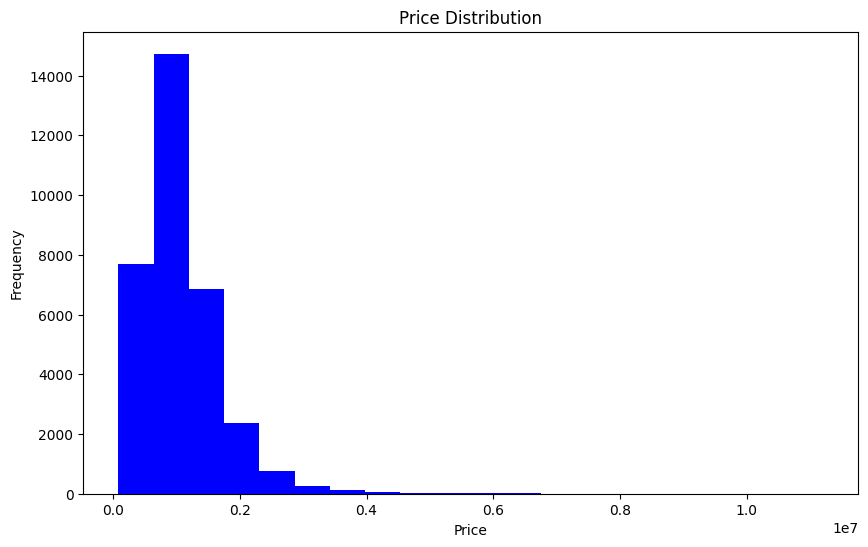

In [368]:
import matplotlib.pyplot as plt

# Histogram oluştur
plt.figure(figsize=(10, 6))
plt.hist(df["Price"], bins=20, color='blue')
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

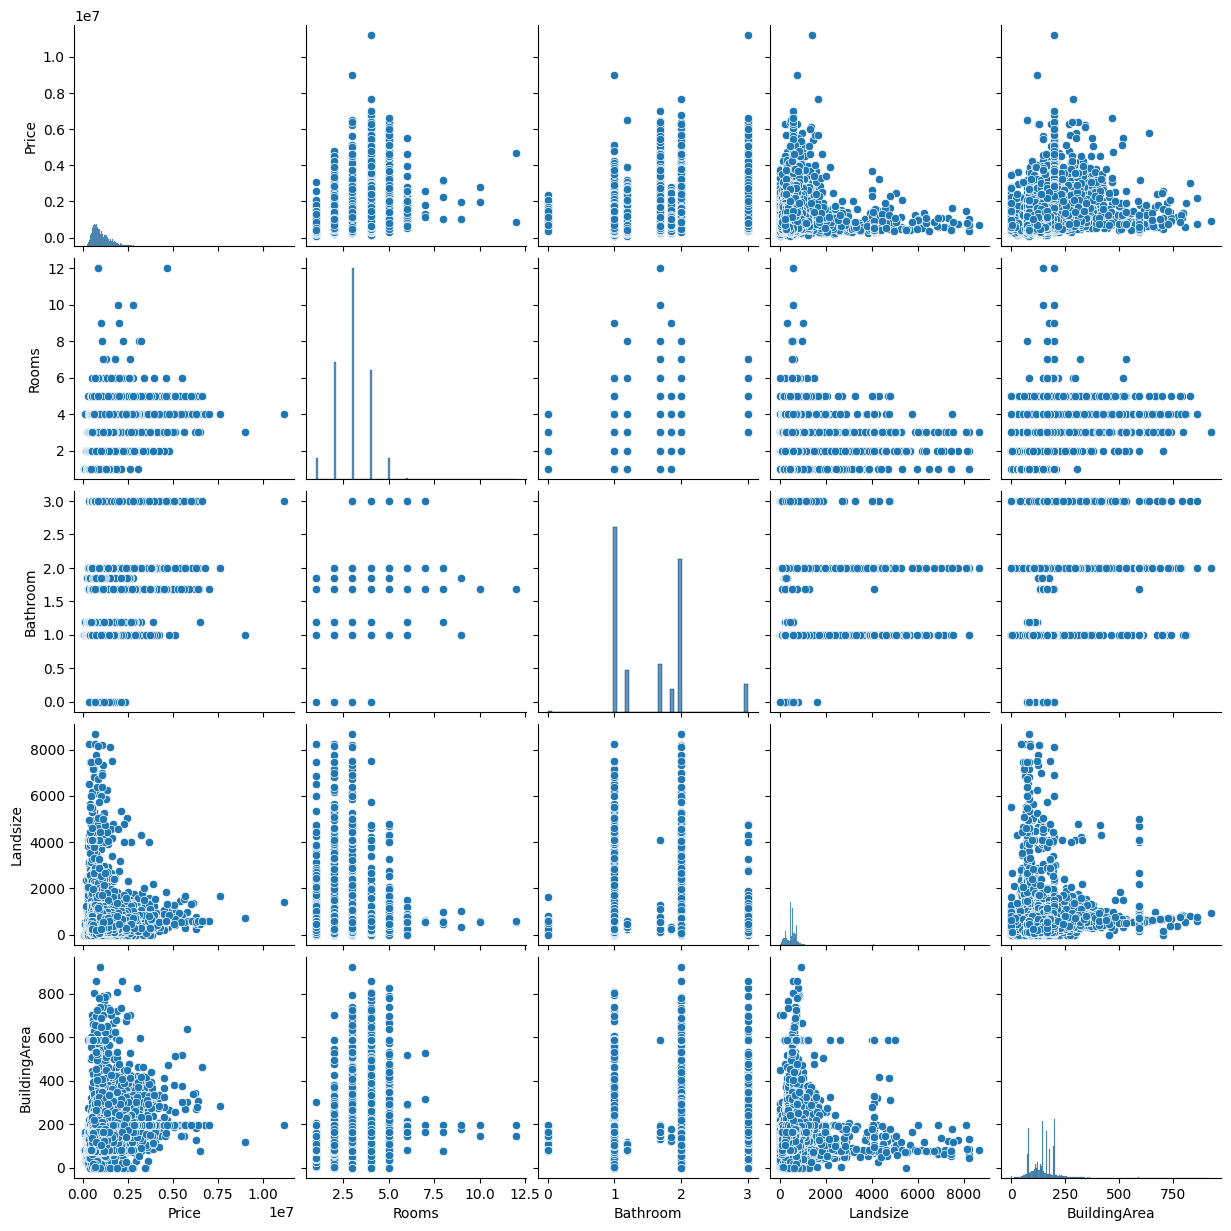

In [369]:
# Çift plot oluşturduk
sns.pairplot(df, vars=["Price", "Rooms", "Bathroom", "Landsize", "BuildingArea"])
plt.show()

In [370]:
unique_values = df.nunique()
print(unique_values)

Suburb             324
Address          32168
Rooms               11
Type                 3
Price             4035
Method               9
SellerG            375
Date                78
Distance           206
Postcode           200
Bedroom2             9
Bathroom             7
Car                 16
Landsize          1611
BuildingArea       685
YearBuilt          150
CouncilArea         33
Lattitude        12865
Longtitude       13935
Regionname           8
Propertycount      320
dtype: int64


# Matrix Oluşturma ve Son Veriseti Hazırlığı

In [374]:
# İki değişkenin toplamını oluştur
df["Toplam_Rooms_Bathroom"] = df["Rooms"] + df["Bathroom"]


In [375]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,TotalValue,Toplam_Rooms_Bathroom
0,Abbotsford,68 Studley St,2,h,9.656154e+05,SS,Jellis,3/09/2016,2.5,3067.0,2.000000,1.000000,1.000000,126.000000,147.252441,1942,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0,9.658886e+05,3.000000
1,Abbotsford,85 Turner St,2,h,1.480000e+06,S,Biggin,3/12/2016,2.5,3067.0,2.000000,1.000000,1.000000,202.000000,147.252441,1942,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0,1.480349e+06,3.000000
2,Abbotsford,25 Bloomburg St,2,h,1.035000e+06,S,Biggin,4/02/2016,2.5,3067.0,2.000000,1.000000,0.000000,156.000000,79.000000,1900,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,1.035235e+06,3.000000
3,Abbotsford,18/659 Victoria St,3,u,9.656154e+05,VB,Rounds,4/02/2016,2.5,3067.0,3.000000,2.000000,1.000000,0.000000,74.912480,1942,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0,9.656903e+05,5.000000
4,Abbotsford,5 Charles St,3,h,1.465000e+06,SP,Biggin,4/03/2017,2.5,3067.0,3.000000,2.000000,0.000000,134.000000,150.000000,1900,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,1.465284e+06,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1.480000e+06,PI,Jas,24/02/2018,6.3,3013.0,4.000000,1.000000,3.000000,593.000000,163.788064,1949,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0,1.480757e+06,5.000000
34853,Yarraville,29A Murray St,2,h,8.880000e+05,SP,Sweeney,24/02/2018,6.3,3013.0,2.000000,2.000000,1.000000,98.000000,104.000000,2018,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0,8.882020e+05,4.000000
34854,Yarraville,147A Severn St,2,t,7.050000e+05,S,Jas,24/02/2018,6.3,3013.0,2.000000,1.000000,2.000000,220.000000,120.000000,2000,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0,7.053400e+05,3.000000
34855,Yarraville,12/37 Stephen St,3,h,1.140000e+06,SP,hockingstuart,24/02/2018,6.3,3013.0,3.333841,1.687678,1.864476,541.941131,163.788064,1949,Maribyrnong City Council,-37.71800,144.87800,Western Metropolitan,6543.0,1.140706e+06,4.687678


In [376]:
# "TotalValue" adında yeni bir sütun oluşturarak mülkün toplam değerini hesapladık
df['TotalValue'] = df['Price'] + df['Landsize'] + df['BuildingArea']


<ipython-input-377-ac4d9bc3ad9d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


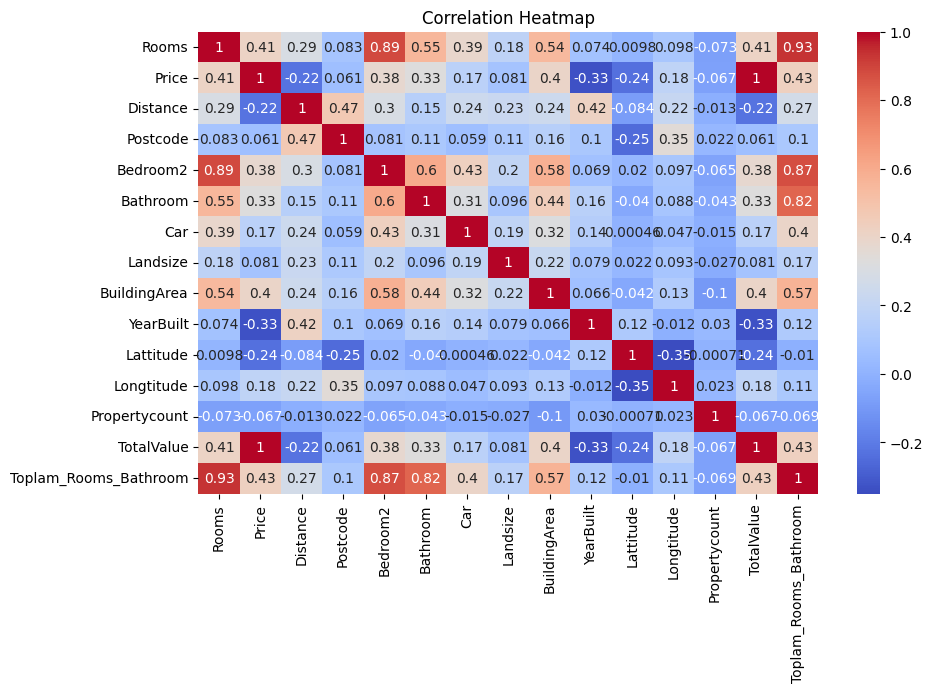

In [377]:
# Korelasyon matrisini hesapla
correlation_matrix = df.corr()

# Isı haritası oluştur
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [378]:
df.drop(['Lattitude', 'Longtitude', 'Landsize', 'Propertycount'], axis=1, inplace=True)


<ipython-input-379-ac4d9bc3ad9d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


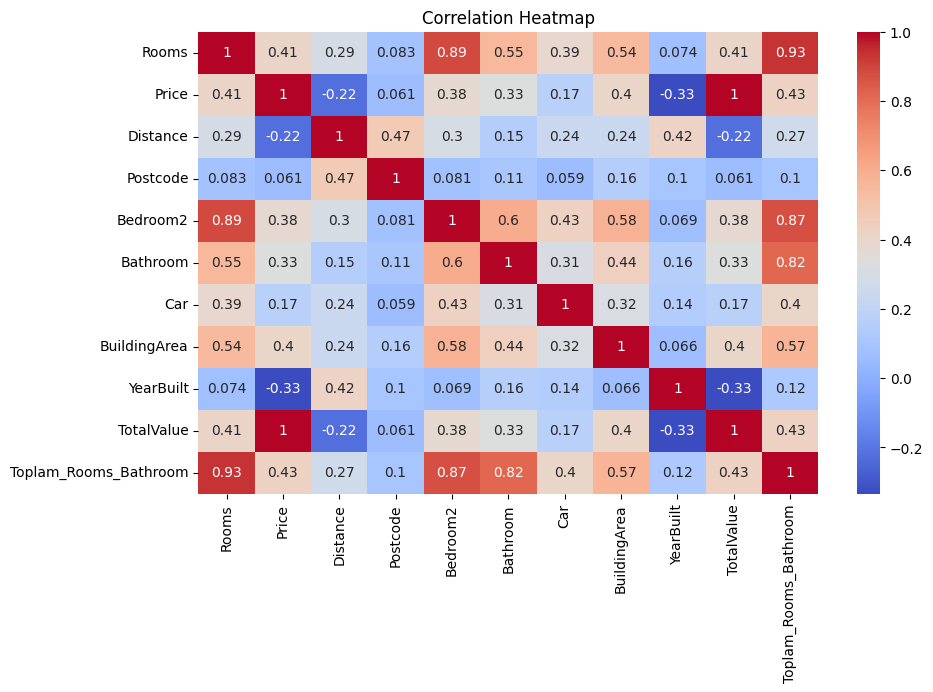

In [379]:
# Korelasyon matrisini hesapla
correlation_matrix = df.corr()

# Isı haritası oluştur
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [380]:
df.drop(['Postcode'], axis=1, inplace=True)


<ipython-input-383-d3516f9c98aa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


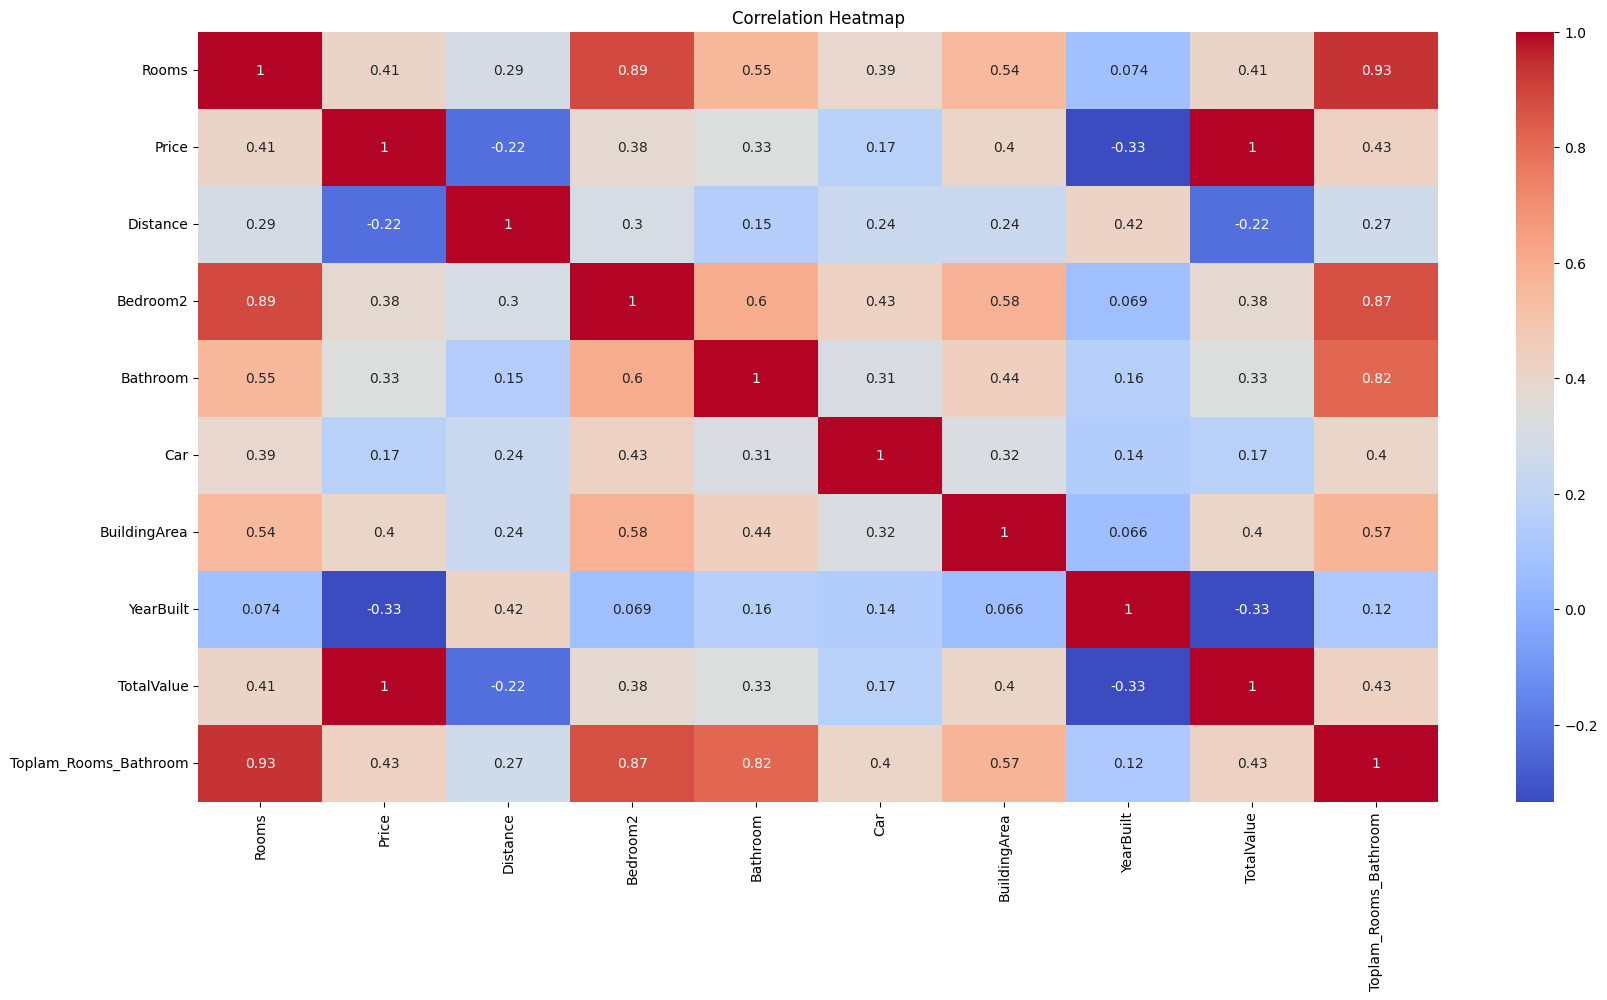

In [383]:
# Korelasyon matrisini hesapla
correlation_matrix = df.corr()

# Isı haritası oluştur
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [382]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Bedroom2,Bathroom,Car,BuildingArea,YearBuilt,CouncilArea,Regionname,TotalValue,Toplam_Rooms_Bathroom
0,Abbotsford,68 Studley St,2,h,9.656154e+05,SS,Jellis,3/09/2016,2.5,2.000000,1.000000,1.000000,147.252441,1942,Yarra City Council,Northern Metropolitan,9.658886e+05,3.000000
1,Abbotsford,85 Turner St,2,h,1.480000e+06,S,Biggin,3/12/2016,2.5,2.000000,1.000000,1.000000,147.252441,1942,Yarra City Council,Northern Metropolitan,1.480349e+06,3.000000
2,Abbotsford,25 Bloomburg St,2,h,1.035000e+06,S,Biggin,4/02/2016,2.5,2.000000,1.000000,0.000000,79.000000,1900,Yarra City Council,Northern Metropolitan,1.035235e+06,3.000000
3,Abbotsford,18/659 Victoria St,3,u,9.656154e+05,VB,Rounds,4/02/2016,2.5,3.000000,2.000000,1.000000,74.912480,1942,Yarra City Council,Northern Metropolitan,9.656903e+05,5.000000
4,Abbotsford,5 Charles St,3,h,1.465000e+06,SP,Biggin,4/03/2017,2.5,3.000000,2.000000,0.000000,150.000000,1900,Yarra City Council,Northern Metropolitan,1.465284e+06,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1.480000e+06,PI,Jas,24/02/2018,6.3,4.000000,1.000000,3.000000,163.788064,1949,Maribyrnong City Council,Western Metropolitan,1.480757e+06,5.000000
34853,Yarraville,29A Murray St,2,h,8.880000e+05,SP,Sweeney,24/02/2018,6.3,2.000000,2.000000,1.000000,104.000000,2018,Maribyrnong City Council,Western Metropolitan,8.882020e+05,4.000000
34854,Yarraville,147A Severn St,2,t,7.050000e+05,S,Jas,24/02/2018,6.3,2.000000,1.000000,2.000000,120.000000,2000,Maribyrnong City Council,Western Metropolitan,7.053400e+05,3.000000
34855,Yarraville,12/37 Stephen St,3,h,1.140000e+06,SP,hockingstuart,24/02/2018,6.3,3.333841,1.687678,1.864476,163.788064,1949,Maribyrnong City Council,Western Metropolitan,1.140706e+06,4.687678


In [384]:
unique_values = df.nunique()
print(unique_values)

Suburb                     324
Address                  32168
Rooms                       11
Type                         3
Price                     4035
Method                       9
SellerG                    375
Date                        78
Distance                   206
Bedroom2                     9
Bathroom                     7
Car                         16
BuildingArea               685
YearBuilt                  150
CouncilArea                 33
Regionname                   8
TotalValue               27475
Toplam_Rooms_Bathroom       32
dtype: int64


## Encoding-Min/Max işlemleri

In [385]:
# "Type" sütununu one-hot encoding ile dönüştürme
df = pd.get_dummies(df, columns=['Type'], prefix='Type', drop_first=True)


In [386]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# "Price" ve "TotalValue" sütunlarını min max scaler yapıldı
df[['Price', 'TotalValue']] = scaler.fit_transform(df[['Price', 'TotalValue']])


In [ ]:
df.drop('Date', axis=1, inplace=True)


In [389]:
df.drop('Method', axis=1, inplace=True)


In [390]:
df

,Suburb,Address,Rooms,Price,SellerG,Distance,Bedroom2,Bathroom,Car,BuildingArea,YearBuilt,CouncilArea,Regionname,TotalValue,Toplam_Rooms_Bathroom,Type_t,Type_u
0,Abbotsford,68 Studley St,2,0.079228,Jellis,2.5,2.000000,1.000000,1.000000,147.252441,1942,Yarra City Council,Northern Metropolitan,0.079234,3.000000,0,0
1,Abbotsford,85 Turner St,2,0.125506,Biggin,2.5,2.000000,1.000000,1.000000,147.252441,1942,Yarra City Council,Northern Metropolitan,0.125513,3.000000,0,0
2,Abbotsford,25 Bloomburg St,2,0.085470,Biggin,2.5,2.000000,1.000000,0.000000,79.000000,1900,Yarra City Council,Northern Metropolitan,0.085472,3.000000,0,0
3,Abbotsford,18/659 Victoria St,3,0.079228,Rounds,2.5,3.000000,2.000000,1.000000,74.912480,1942,Yarra City Council,Northern Metropolitan,0.079216,5.000000,0,1
4,Abbotsford,5 Charles St,3,0.124157,Biggin,2.5,3.000000,2.000000,0.000000,150.000000,1900,Yarra City Council,Northern Metropolitan,0.124158,5.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,0.125506,Jas,6.3,4.000000,1.000000,3.000000,163.788064,1949,Maribyrnong City Council,Western Metropolitan,0.125550,5.000000,0,0
34853,Yarraville,29A Murray St,2,0.072245,Sweeney,6.3,2.000000,2.000000,1.000000,104.000000,2018,Maribyrnong City Council,Western Metropolitan,0.072246,4.000000,0,0
34854,Yarraville,147A Severn St,2,0.055780,Jas,6.3,2.000000,1.000000,2.000000,120.000000,2000,Maribyrnong City Council,Western Metropolitan,0.055796,3.000000,1,0
34855,Yarraville,12/37 Stephen St,3,0.094917,hockingstuart,6.3,3.333841,1.687678,1.864476,163.788064,1949,Maribyrnong City Council,Western Metropolitan,0.094960,4.687678,0,0


### Gerekli Feature oluşturma aşamaları

In [391]:
# "Suburb," "CouncilArea," ve "Regionname" sütunlarını birleştirip yeni "Location" sütununu oluşturun
df['Location'] = df['Suburb'] + ', ' + df['CouncilArea'] + ', ' + df['Regionname']

# Eski sütunları silebilirsiniz, eğer gerekmiyorsa
df.drop(['Suburb', 'CouncilArea', 'Regionname'], axis=1, inplace=True)


In [392]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max ölçekleyiciyi oluşturun
scaler = MinMaxScaler()

# "BuildingArea" sütununu kullanarak Min-Max ölçeklemeyi uygulayın
df['BuildingArea'] = scaler.fit_transform(df['BuildingArea'].values.reshape(-1, 1))


In [393]:
df

,Address,Rooms,Price,SellerG,Distance,Bedroom2,Bathroom,Car,BuildingArea,YearBuilt,TotalValue,Toplam_Rooms_Bathroom,Type_t,Type_u,Location
0,68 Studley St,2,0.079228,Jellis,2.5,2.000000,1.000000,1.000000,0.159364,1942,0.079234,3.000000,0,0,"Abbotsford, Yarra City Council, Northern Metro..."
1,85 Turner St,2,0.125506,Biggin,2.5,2.000000,1.000000,1.000000,0.159364,1942,0.125513,3.000000,0,0,"Abbotsford, Yarra City Council, Northern Metro..."
2,25 Bloomburg St,2,0.085470,Biggin,2.5,2.000000,1.000000,0.000000,0.085498,1900,0.085472,3.000000,0,0,"Abbotsford, Yarra City Council, Northern Metro..."
3,18/659 Victoria St,3,0.079228,Rounds,2.5,3.000000,2.000000,1.000000,0.081074,1942,0.079216,5.000000,0,1,"Abbotsford, Yarra City Council, Northern Metro..."
4,5 Charles St,3,0.124157,Biggin,2.5,3.000000,2.000000,0.000000,0.162338,1900,0.124158,5.000000,0,0,"Abbotsford, Yarra City Council, Northern Metro..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,13 Burns St,4,0.125506,Jas,6.3,4.000000,1.000000,3.000000,0.177260,1949,0.125550,5.000000,0,0,"Yarraville, Maribyrnong City Council, Western ..."
34853,29A Murray St,2,0.072245,Sweeney,6.3,2.000000,2.000000,1.000000,0.112554,2018,0.072246,4.000000,0,0,"Yarraville, Maribyrnong City Council, Western ..."
34854,147A Severn St,2,0.055780,Jas,6.3,2.000000,1.000000,2.000000,0.129870,2000,0.055796,3.000000,1,0,"Yarraville, Maribyrnong City Council, Western ..."
34855,12/37 Stephen St,3,0.094917,hockingstuart,6.3,3.333841,1.687678,1.864476,0.177260,1949,0.094960,4.687678,0,0,"Yarraville, Maribyrnong City Council, Western ..."


## Son Matrix Oluşturma

<ipython-input-394-d3516f9c98aa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


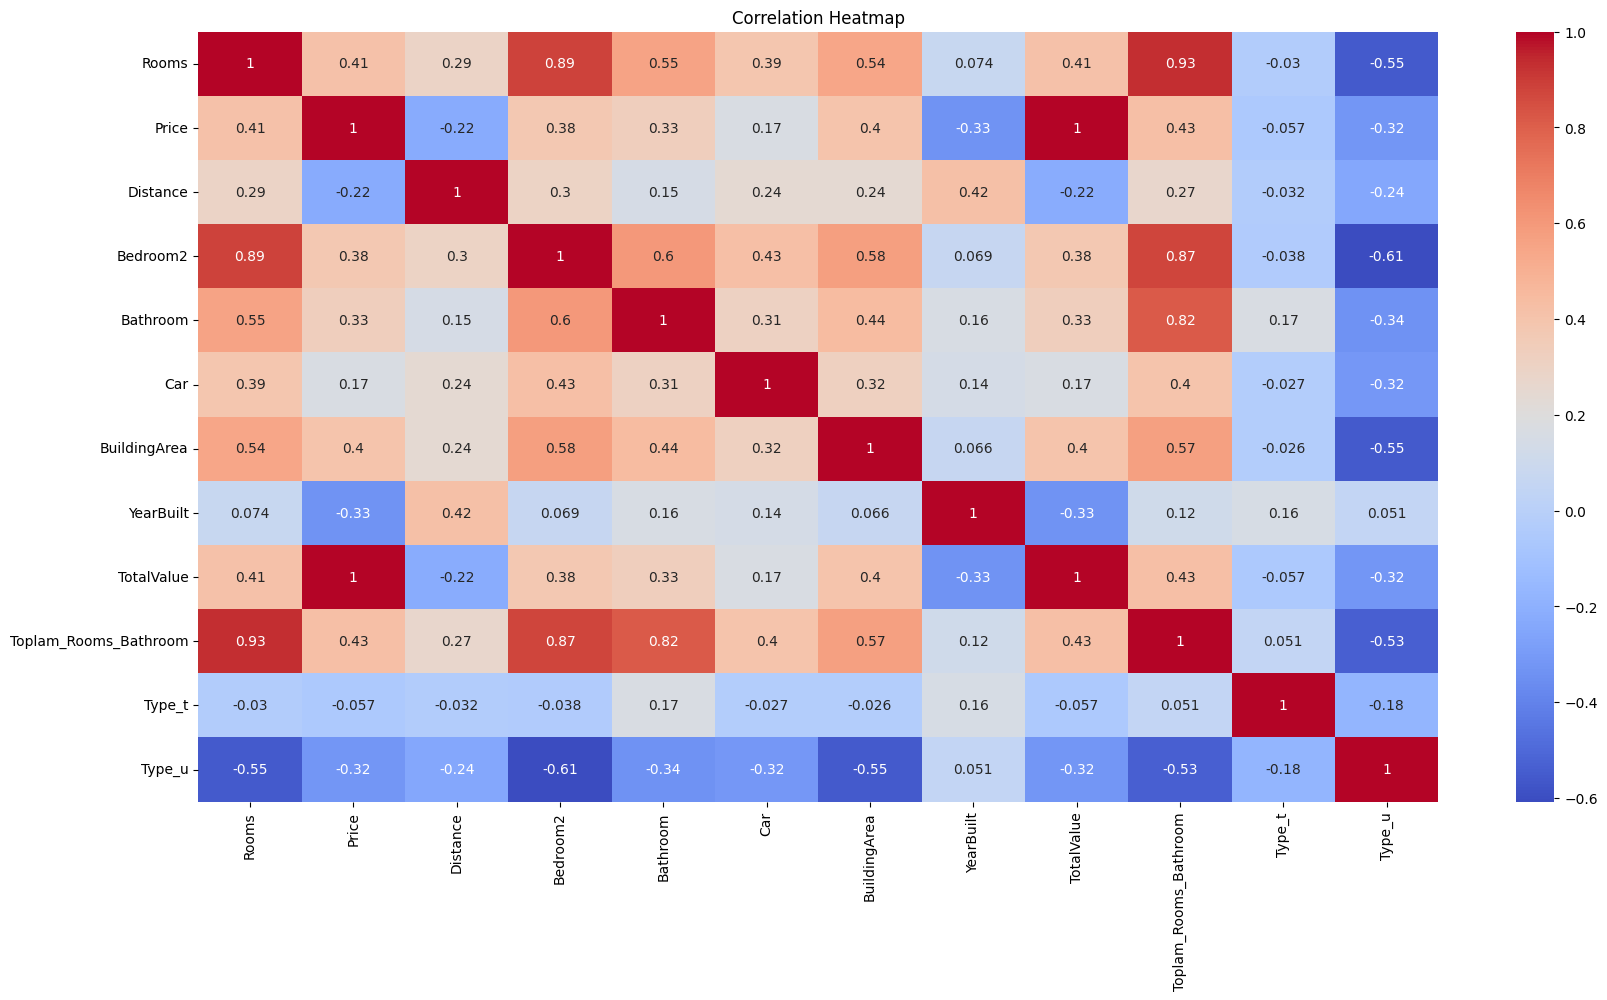

In [394]:
# Korelasyon matrisini hesapla
correlation_matrix = df.corr()

# Isı haritası oluştur
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [400]:
df_1= pd.get_dummies(df, columns=['Location'], drop_first=True)


# Model oluşturma Aşaması

In [402]:
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Özellikleri ve hedef değişkeni tanımlayın
X = df_1[['TotalValue', 'Toplam_Rooms_Bathroom']]  # Örnek özellikler
Y = df_1['Price']  # Hedef değişken

# Veriyi eğitim ve test verilerine ayırın
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Modelleri oluşturun ve eğitin
models = {
    'Lasso': {'model': Lasso()},
    'LinearRegression': {'model': LinearRegression()},
    'Ridge': {'model': Ridge()},
    'ElasticNet': {'model': ElasticNet()},
    'KNeighborsRegressor': {'model': KNeighborsRegressor()},
    'RandomForestRegressor': {'model': RandomForestRegressor()},
    'GradientBoostingRegressor': {'model': GradientBoostingRegressor()},
    'AdaBoostRegressor': {'model': AdaBoostRegressor(n_estimators=5, learning_rate=1.2, loss='exponential', random_state=2)}
}

for model_name, model_params in models.items():
    model = model_params['model']
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    mse = mean_squared_error(Y_test, Y_pred)
    print(f"{model_name} - Ortalama Kare Hata: {mse}")


Lasso - Ortalama Kare Hata: 0.002951436961245168
LinearRegression - Ortalama Kare Hata: 1.7785162365441335e-09
Ridge - Ortalama Kare Hata: 5.540306593465769e-07
ElasticNet - Ortalama Kare Hata: 0.002951436961245168
KNeighborsRegressor - Ortalama Kare Hata: 1.312880099275051e-05
RandomForestRegressor - Ortalama Kare Hata: 8.475160637314606e-07
GradientBoostingRegressor - Ortalama Kare Hata: 8.655725820490789e-07
AdaBoostRegressor - Ortalama Kare Hata: 7.267123209456683e-05


## Cross Validation işlemi

In [408]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, Y_train, cv=5)



In [409]:
scores

array([0.99999949, 0.99999949, 0.99999944, 0.9999995 , 0.99999939])

## Linear Regression İşlemi

In [404]:
from sklearn.metrics import r2_score
# Linear Regression modelini oluşturduk ve eğittik
model = LinearRegression()
model.fit(X_train, Y_train)

# Tahminleri yapıldı
Y_pred = model.predict(X_test)

# Ortalama Kare Hata (MSE) hesapladık
mse = mean_squared_error(Y_test, Y_pred)
print("Linear Regression - Ortalama Kare Hata:", mse)

# R-squared (R^2) değerini hesapladık
r2 = r2_score(Y_test, Y_pred)
print("R-squared (R^2) Değeri:", r2)


Linear Regression - Ortalama Kare Hata: 1.7785162365441335e-09
R-squared (R^2) Değeri: 0.999999397389793
